## Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка данных

In [2]:
df_start = pd.read_csv('GlobalLandTemperaturesByCity.csv')

## Просмотр информации о данных

In [3]:
df_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [4]:
df_start['dt'] = pd.to_datetime(df_start['dt'])

In [5]:
df_start.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


Приведем столбцы к нижнему регистру

In [6]:
df_start.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [7]:
df_start.columns = [x.lower() for x in df_start.columns]

Создаем отдельную таблицу только для российских городов

In [8]:
df_Russia = df_start[df_start['country'] == 'Russia']

In [9]:
df_Russia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461234 entries, 30064 to 8578956
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             461234 non-null  datetime64[ns]
 1   averagetemperature             448663 non-null  float64       
 2   averagetemperatureuncertainty  448663 non-null  float64       
 3   city                           461234 non-null  object        
 4   country                        461234 non-null  object        
 5   latitude                       461234 non-null  object        
 6   longitude                      461234 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 28.2+ MB


Количество строк без значений меньше 10%, просто уберем их

In [10]:
df_Russia = df_Russia.dropna()

In [11]:
df_Russia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448663 entries, 30064 to 8578955
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             448663 non-null  datetime64[ns]
 1   averagetemperature             448663 non-null  float64       
 2   averagetemperatureuncertainty  448663 non-null  float64       
 3   city                           448663 non-null  object        
 4   country                        448663 non-null  object        
 5   latitude                       448663 non-null  object        
 6   longitude                      448663 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 27.4+ MB


In [12]:
russia_year_mean = (df_Russia.groupby(pd.Grouper(key='dt', freq='Y'))
                  ['averagetemperature']
                  .mean()
                  .reset_index(name='Avg'))
#russia_year_mean

In [13]:
russia_year_mean['dt'] = pd.DatetimeIndex(russia_year_mean['dt']).year
russia_year_mean = russia_year_mean.dropna().reset_index(drop=True)

## Выход задачи 3

In [14]:
russia_year_mean

,dt,Avg
0,1743,-2.877295
1,1744,6.978618
2,1745,-6.259558
3,1750,4.992516
4,1751,5.290917
...,...,...
262,2009,4.449978
263,2010,4.640022
264,2011,4.386322
265,2012,4.501149


In [15]:
df_Russia['city'].unique()

array(['Abakan', 'Achinsk', 'Almetyevsk', 'Angarsk', 'Arkhangelsk',
       'Armavir', 'Arzamas', 'Astrakhan', 'Balakovo', 'Balashikha',
       'Barnaul', 'Bataysk', 'Belgorod', 'Berezniki', 'Biysk',
       'Blagoveshchensk', 'Bratsk', 'Bryansk', 'Cheboksary',
       'Chelyabinsk', 'Cherepovets', 'Cherkessk', 'Chita', 'Derbent',
       'Dimitrovgrad', 'Dzerzhinsk', 'Elektrostal', 'Elista', 'Engels',
       'Glazov', 'Heihe', 'Irkutsk', 'Ivanovo', 'Izhevsk', 'Kaliningrad',
       'Kaluga', 'Kamensk Uralskiy', 'Kamyshin', 'Kansk', 'Kazan',
       'Kemerovo', 'Khabarovsk', 'Khimki', 'Kirov', 'Kislovodsk',
       'Kolomna', 'Kolpino', 'Komsomolsk Na Amure', 'Kostroma', 'Kovrov',
       'Krasnodar', 'Krasnoyarsk', 'Kurgan', 'Kursk', 'Kyzyl',
       'Leninsk Kuznetskiy', 'Lipetsk', 'Lyubertsy', 'Magnitogorsk',
       'Makhachkala', 'Maykop', 'Mezhdurechensk', 'Miass', 'Moscow',
       'Murmansk', 'Murom', 'Mytishchi', 'Nakhodka', 'Nalchik', 'Nazran',
       'Neftekamsk', 'Nefteyugansk', 'Nevi

In [16]:
df_Belgorod = df_Russia[df_Russia['city'] == 'Belgorod']

## Выход задачи 4

In [17]:
Belgorod_year_mean = (df_Belgorod.groupby(pd.Grouper(key='dt', freq='Y'))
                  ['averagetemperature']
                  .mean()
                  .reset_index(name='Avg'))
Belgorod_year_mean['dt'] = pd.DatetimeIndex(Belgorod_year_mean['dt']).year
Belgorod_year_mean = Belgorod_year_mean.dropna().reset_index(drop=True)
Belgorod_year_mean

,dt,Avg
0,1743,-0.878000
1,1744,8.821500
2,1745,-4.053000
3,1750,6.877364
4,1751,7.243625
...,...,...
262,2009,8.003750
263,2010,8.646750
264,2011,7.250750
265,2012,8.009750


In [18]:
df_Abakan = df_Russia[df_Russia['city'] == 'Abakan']

## Выход задачи 5

In [19]:
Abakan_year_mean = (df_Abakan.groupby(pd.Grouper(key='dt', freq='Y'))
                  ['averagetemperature']
                  .mean()
                  .reset_index(name='Avg'))
Abakan_year_mean['dt'] = pd.DatetimeIndex(Abakan_year_mean['dt']).year
Abakan_year_mean = Abakan_year_mean.dropna().reset_index(drop=True)

Abakan_month_mean = (df_Abakan.groupby(pd.Grouper(key='dt', freq='M'))
                  ['averagetemperature']
                  .mean()
                  .reset_index(name='Avg'))
Abakan_month_mean['dt'] = pd.DatetimeIndex(Abakan_month_mean['dt']).month
Abakan_month_mean = Abakan_month_mean.dropna().reset_index(drop=True)

Abakan_year_max = Abakan_year_mean.max()
Abakan_year_min = Abakan_year_mean.min()
Abakan_month_max = Abakan_month_mean.max()
Abakan_month_min = Abakan_month_mean.min()
res = pd.DataFrame({'Максимальная среднегодовая температура в Абакане': Abakan_year_max, 'Минимальная среднегодовая температура в Абакане': Abakan_year_min,
                   'Максимальная среднемесячная температура в Абакане': Abakan_month_max, 'Минимальная среднемесячная температура в Абакане': Abakan_month_min})
res

,Максимальная среднегодовая температура в Абакане,Минимальная среднегодовая температура в Абакане,Максимальная среднемесячная температура в Абакане,Минимальная среднемесячная температура в Абакане
dt,2013.000000,1820.000,12.000,1.000
Avg,2.606583,-2.778,21.503,-31.138


## Выход задачи 6

In [20]:
df_Arkhangelsk = df_Russia[df_Russia['city'] == 'Arkhangelsk']
ar_max = df_Arkhangelsk.max()
ar_min = df_Arkhangelsk.min()
print('Максимальная температура: ', ar_max['dt'])
print('Минимальная температура: ', ar_min['dt'])

Максимальная температура:  2013-08-01 00:00:00
Минимальная температура:  1743-11-01 00:00:00


## Выход задачи 7

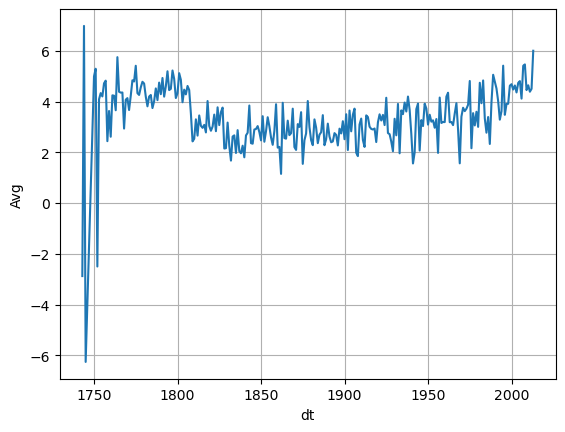

In [21]:
a = sns.lineplot(data = russia_year_mean, x = 'dt', y = 'Avg')
a.grid()

In [22]:
df_Blagoveshchensk = df_Russia[df_Russia['city'] == 'Blagoveshchensk']

In [23]:
Blagoveshchensk_year_mean = (df_Blagoveshchensk.groupby(pd.Grouper(key='dt', freq='Y'))
                  ['averagetemperature']
                  .mean()
                  .reset_index(name='Avg'))
Blagoveshchensk_year_mean['dt'] = pd.DatetimeIndex(Blagoveshchensk_year_mean['dt']).year
Blagoveshchensk_year_mean = Belgorod_year_mean.dropna().reset_index(drop=True)
Blagoveshchensk_year_mean

,dt,Avg
0,1743,-0.878000
1,1744,8.821500
2,1745,-4.053000
3,1750,6.877364
4,1751,7.243625
...,...,...
262,2009,8.003750
263,2010,8.646750
264,2011,7.250750
265,2012,8.009750


## Выход задачи 8

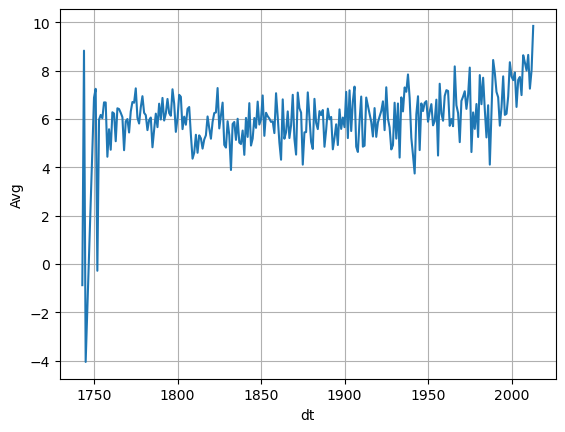

In [24]:
a = sns.lineplot(data = Blagoveshchensk_year_mean, x = 'dt', y = 'Avg')
a.grid()

In [25]:
russia_month_mean = (df_Russia.groupby(pd.Grouper(key='dt', freq='M'))
                  ['averagetemperature']
                  .mean()
                  .reset_index(name='Avg'))

russia_month_mean['dt'] = pd.DatetimeIndex(russia_month_mean['dt']).month
russia_month_mean = russia_month_mean.dropna().reset_index(drop=True)

russia_month_mean

,dt,Avg
0,11,-2.877295
1,4,6.722853
2,5,10.550411
3,6,16.255926
4,7,18.511821
...,...,...
3161,4,5.214122
3162,5,13.672333
3163,6,18.079391
3164,7,19.187853


## Выход задачи 10

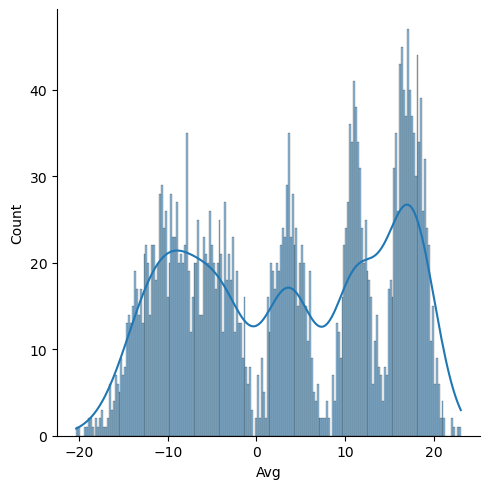

In [26]:
sns.displot(russia_month_mean, x='Avg', bins=200, kde=True)

In [27]:
df_Bataysk = df_Russia[df_Russia['city'] == 'Bataysk']

In [28]:
Bataysk_month_mean = (df_Bataysk.groupby(pd.Grouper(key='dt', freq='Y'))
                  ['averagetemperature']
                  .mean()
                  .reset_index(name='Avg'))
Bataysk_month_mean['dt'] = pd.DatetimeIndex(Bataysk_month_mean['dt']).month
Bataysk_month_mean = Bataysk_month_mean.dropna().reset_index(drop=True)
Bataysk_month_mean

,dt,Avg
0,12,1.770000
1,12,11.519375
2,12,-1.096500
3,12,9.611727
4,12,10.170875
...,...,...
262,12,10.807417
263,12,11.681500
264,12,9.619667
265,12,10.625583


## Выход задачи 11

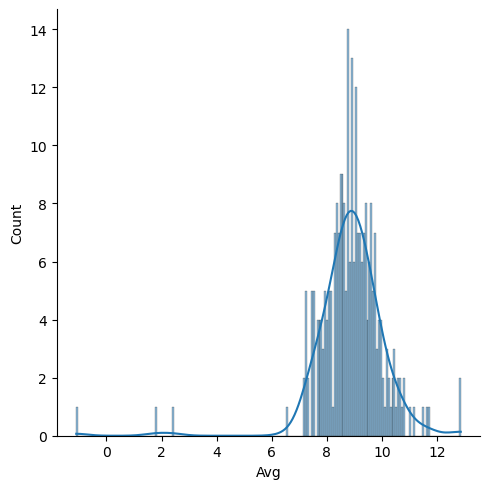

In [29]:
sns.displot(Bataysk_month_mean, x='Avg', bins=200, kde=True)